In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../data/Train/train.csv', index_col=0)

In [3]:
train[:5]

,adult_males,subadult_males,adult_females,juveniles,pups
train_id,,,,,
0,62,12,486,42,344
1,2,20,0,12,0
2,2,0,38,20,0
3,8,5,41,7,38
4,6,9,2,0,0


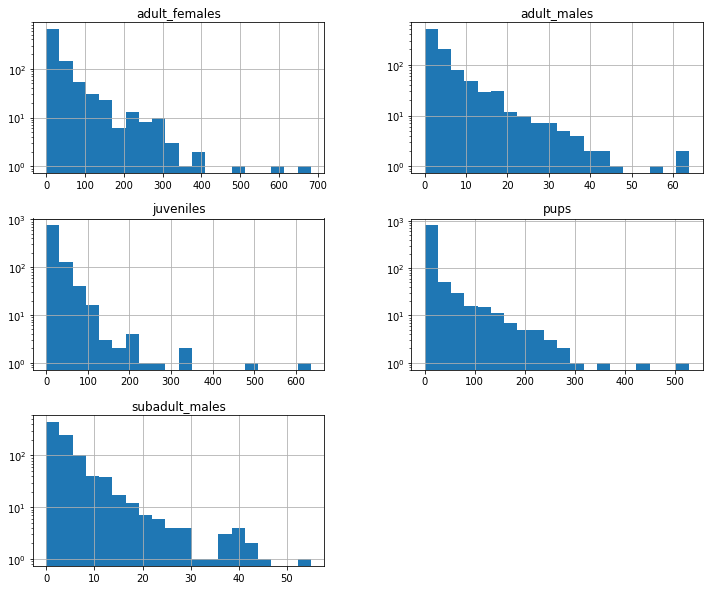

In [4]:
train.hist(figsize=(12, 10), bins=20, log=True);

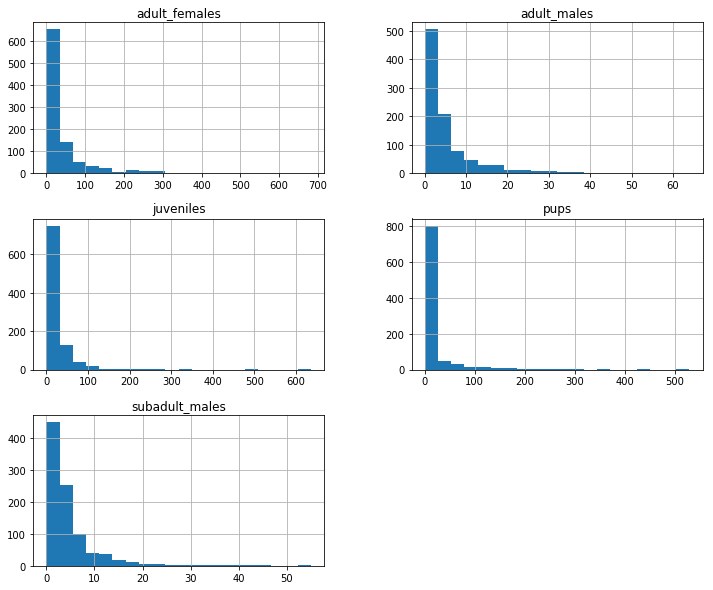

In [8]:
train.hist(figsize=(12, 10), bins=20);

In [5]:
pred = pd.read_csv('../unet-limit800-fold3-scale-0.5-1.5-all-sums.csv', index_col=0)

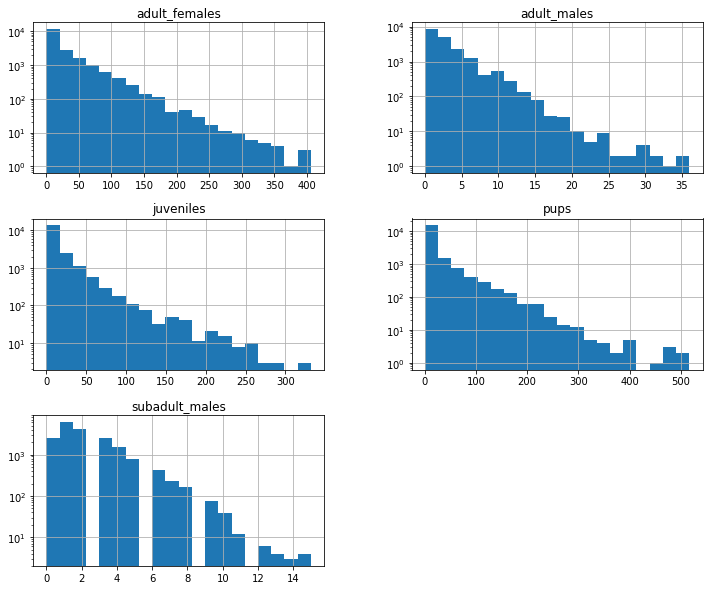

In [6]:
pred.hist(figsize=(12, 10), bins=20, log=True);

In [7]:
pred.pups.mean()

17.789332474779997

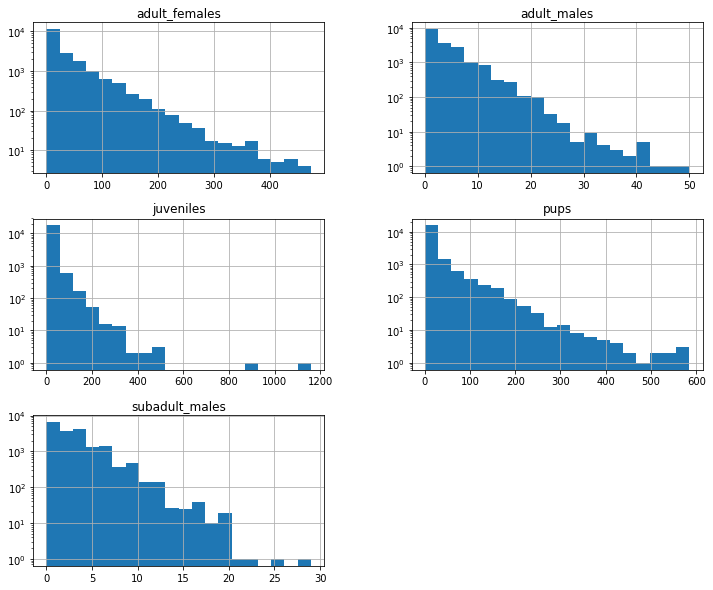

In [10]:
pred2 = pd.read_csv('../unet-limit800-fold3-scale-0.5-1.5-test0.75-sums.csv', index_col=0)
pred2.hist(figsize=(12, 10), bins=20, log=True);

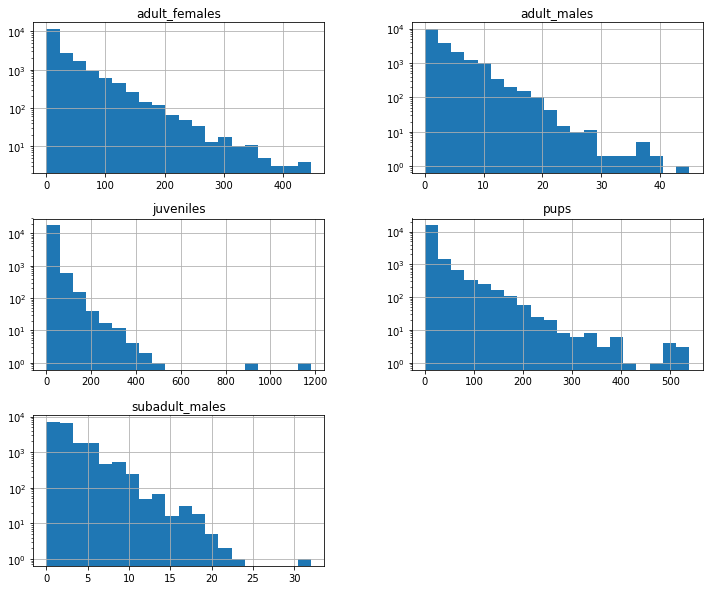

In [20]:
pred3 = pd.read_csv('../unet-limit800-fold3-scale-0.5-1.5-test0.75-blobs.csv', index_col=0)
pred3.hist(figsize=(12, 10), bins=20, log=True);

In [12]:
pred.describe()

,adult_males,subadult_males,adult_females,juveniles,pups
count,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000
mean,2.793142,2.076519,27.553552,15.581831,17.789332
std,3.117359,1.795365,39.611010,27.003145,37.871431
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,11.000000,5.000000,3.000000
75%,4.000000,3.000000,37.000000,18.000000,15.000000
max,36.000000,15.000000,406.000000,332.000000,517.000000


In [13]:
pred2.describe()

,adult_males,subadult_males,adult_females,juveniles,pups
count,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000
mean,3.912535,2.993024,35.260464,14.766795,18.519264
std,4.190932,2.668593,49.848775,28.702587,39.357858
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.000000,2.000000,1.000000
50%,3.000000,2.000000,15.000000,5.000000,4.000000
75%,5.000000,4.000000,47.000000,16.000000,15.000000
max,50.000000,29.000000,474.000000,1159.000000,585.000000


In [14]:
pred3.describe()

,adult_males,subadult_males,adult_females,juveniles,pups
count,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000
mean,3.643647,2.766849,31.485083,14.509659,17.097660
std,3.845224,2.443391,45.040224,28.446923,36.338319
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,1.000000
50%,2.000000,2.000000,13.000000,5.000000,3.000000
75%,5.000000,4.000000,42.000000,16.000000,14.000000
max,45.000000,32.000000,447.000000,1181.000000,539.000000


In [17]:
(pred3.juveniles > 500).sum()

2

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

for col in pred.columns:
    print()
    print(col)
    print(np.sqrt(mean_squared_error(pred[col], pred2[col])))
    print(np.sqrt(mean_squared_error(pred[col], pred3[col])))
    print(np.sqrt(mean_squared_error(pred2[col], pred3[col])))


adult_males
1.9394543436
1.78955616523
0.75093845558

subadult_males
1.59421846612
1.44686603908
0.687054115004

adult_females
14.2906578544
10.4291063305
8.08570479438

juveniles
15.0388225513
15.4196137464
3.28234233369

pups
7.55845432674
8.0934656018
3.95997765804


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

pred_last = pd.read_csv(
    '../runs/unet-stratified-scale-0.8-1.6-oversample0.2/unet-stratified-scale-0.8-1.6-oversample0.2.csv',
    index_col=0)

rmses = []
#sigma = 0.48
sigma = 0.85
for col in pred_last.columns:
    rmse = np.sqrt(mean_squared_error(
        pred_last[col], np.random.normal(1, sigma, size=len(pred_last)) * pred_last[col]))
    print(col, rmse)
    rmses.append(rmse)
print()
print(np.mean(rmses))

adult_males 4.1910694682
subadult_males 2.79941069667
adult_females 38.5814065352
juveniles 26.4208555424
pups 28.0199585139

20.0025401513


In [16]:
np.random.normal(0, 1, size=len(pred_last)) * pred_last['adult_males']

test_id
0         1.059223
1        -0.479074
2        -0.004191
3        -0.000000
4         1.202407
5        -1.506700
6        -0.000000
7         0.081198
8         2.402270
9         2.625995
10       -1.789798
11        0.251750
12        2.188531
13        4.661497
14        0.000000
15        1.678515
16        0.993601
17        1.171332
18        2.356478
19       -0.872747
20       10.814704
21       -0.313824
22       -2.753740
23       -0.000000
24        1.706531
25       -0.686283
26        0.622559
27        6.807497
28       -0.087815
29        0.663787
           ...    
18606    -1.460271
18607    -4.265636
18608     0.380563
18609    -4.368636
18610     6.171374
18611    -5.633124
18612     0.521783
18613    -0.818028
18614    -0.081845
18615   -15.562794
18616    -1.953328
18617    -0.205512
18618    -1.490448
18619     1.257499
18620    -0.000000
18621    -1.862985
18622    -5.937944
18623     1.516227
18624     0.983030
18625    -3.762078
18626    10.154590
1862